In [1]:
import sys
sys.path.append("/home/lionel/Documents/spine_diffusion")
import os
from spine_diffusion.datasets.random_deformation_dataset import RandomDeformationDataset
from jaxtyping import Float, Float32, Int64
import torch
from torch import Tensor
from torch.utils.data import DataLoader
from spine_diffusion.datasets.collations import collate_fn
from torchvision.utils import save_image

def multiclassLong_to_multiChannel(
        multiclass: Int64[Tensor, "batch 1 depth height width"]
    ) -> Float[Tensor, "batch num_classes depth height width"]:
    """Create multi-channel tensor from multi-class Int tensor."""
    assert (multiclass.dim() == 5) and (multiclass.shape[1] == 1) and (multiclass.dtype == torch.int64)
    u_vals = multiclass.unique()
    multiclass = [(multiclass==elem).to(torch.float32) for elem in u_vals]
    return torch.cat(multiclass, dim=1)

def multiChannel_to_multiclassLong(
    multichannel: Float[Tensor, "batch num_classes depth height width"]
) -> Int64[Tensor, "batch 1 depth height width"]:
    """Create multi-class Int tensor from multi-channel predictions."""
    _, max_idx = torch.max(multichannel, dim=1)
    return max_idx

In [2]:
ds = RandomDeformationDataset(
    "/home/lionel/Data/Atlas_Houdini_deformations_vdsn",
    "/home/lionel/Data/Atlas_Houdini_deformations_vdsn",
    "settings_dict_ideal_patient_corr_vdsn.json",
    "train",
    resolution=256,
    class_mode="nerves",
    rand_coords=True,
    num_points=10,
    num_samples=1
)

dl = DataLoader(ds, batch_size=len(ds), collate_fn=collate_fn)

No specific patient is chosen. Taking all patients in this dataset folder.
hqFiles: 74
Preprocessing files...
Preprocessing done. Files: 74 mode: train
hqLabels: {1: 'L1', 2: 'L1-L2', 3: 'L2', 4: 'L2-L3', 5: 'L3', 6: 'L3-L4', 7: 'L4', 8: 'L4-L5', 9: 'L5', 11: 'sc', 12: 'nerveroots'}


In [3]:
len(dl)

1

In [4]:
import numpy as np

runner = 0
root = "/home/lionel/Data/Atlas_Houdini2D_nerves"
sample = next(iter(dl))

In [9]:
sample.shape

torch.Size([74, 1, 256, 256, 256])

In [10]:
sample.dtype

torch.int64

In [11]:
sample = multiclassLong_to_multiChannel(sample)

In [12]:
sample.shape

torch.Size([74, 3, 256, 256, 256])

In [19]:
number = 0
for i in range(sample.shape[0]):
    for j in range(256):

        temp = sample[i,:,j]
        if not ((temp==0).all() or (temp==1).all() or (temp==2).all()):
            np.save(os.path.join(root, f"sample_{number}.npy"), temp)
            number += 1

        temp = sample[i,:,:,j]
        if not ((temp==0).all() or (temp==1).all() or (temp==2).all()):
            np.save(os.path.join(root, f"sample_{number}.npy"), temp)
            number += 1

        if not ((temp==0).all() or (temp==1).all() or (temp==2).all()):
            temp = sample[i,:,:,:,j]
            np.save(os.path.join(root, f"sample_{number}.npy"), temp)
            number += 1

In [20]:
from diffusion_models.utils.datasets import LumbarSpineDataset

ds = LumbarSpineDataset()

In [21]:
len(ds)

56832

In [22]:
sample = ds[0]

In [23]:
sample[0].shape

torch.Size([3, 128, 128])

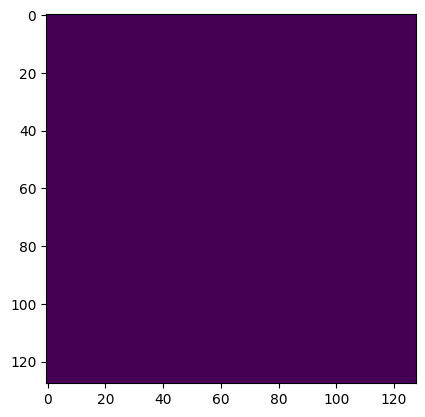

In [24]:
import matplotlib.pyplot as plt

plt.imshow(ds[128][0][2])

In [9]:
ds[128][0].shape

torch.Size([3, 128, 128])

In [16]:
ds.files

['/home/lionel/Data/Atlas_Houdini2D_nerves/sample_0.npy',
 '/home/lionel/Data/Atlas_Houdini2D_nerves/sample_1.npy',
 '/home/lionel/Data/Atlas_Houdini2D_nerves/sample_10.npy',
 '/home/lionel/Data/Atlas_Houdini2D_nerves/sample_100.npy',
 '/home/lionel/Data/Atlas_Houdini2D_nerves/sample_1000.npy',
 '/home/lionel/Data/Atlas_Houdini2D_nerves/sample_10000.npy',
 '/home/lionel/Data/Atlas_Houdini2D_nerves/sample_10001.npy',
 '/home/lionel/Data/Atlas_Houdini2D_nerves/sample_10002.npy',
 '/home/lionel/Data/Atlas_Houdini2D_nerves/sample_10003.npy',
 '/home/lionel/Data/Atlas_Houdini2D_nerves/sample_10004.npy',
 '/home/lionel/Data/Atlas_Houdini2D_nerves/sample_10005.npy',
 '/home/lionel/Data/Atlas_Houdini2D_nerves/sample_10006.npy',
 '/home/lionel/Data/Atlas_Houdini2D_nerves/sample_10007.npy',
 '/home/lionel/Data/Atlas_Houdini2D_nerves/sample_10008.npy',
 '/home/lionel/Data/Atlas_Houdini2D_nerves/sample_10009.npy',
 '/home/lionel/Data/Atlas_Houdini2D_nerves/sample_1001.npy',
 '/home/lionel/Data/Atl

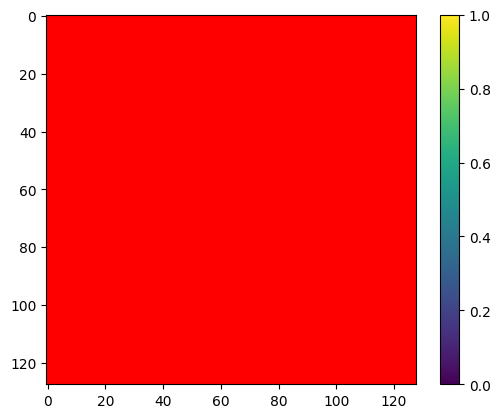

In [45]:
import torch

i = torch.randint(0, len(ds), size=(1,))
plt.imshow(ds[i][0].permute(1,2,0))
plt.colorbar()